<a href="https://colab.research.google.com/github/Gcango/Projecto_1_Emprestimo/blob/main/Emprestimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O conjunto de dados para este projeto é proveniente da base de dados da SOCREDITE, um serviço de assistência financeira que oferece empréstimos monetários para indivíduos necessitados. Os clientes da SOCREDITE recebem valores monetários para diversas finalidades e concordam em devolver o empréstimo em parcelas dentro de um prazo estabelecido pela empresa. Este conjunto de dados inclui informações como o nome do beneficiário, o valor do empréstimo e os detalhes das parcelas acordadas entre as partes envolvidas. O nosso objetivo é analisar esses dados e tentar responder a algumas questões importantes:

a) Quanto cada cliente deve pagar ao todo?
b) Em que prazo os clientes poderão efetuar esses pagamentos?
c) Qual foi o montante total dos empréstimos concedidos?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

In [2]:
dados = pd.read_excel("/content/Transacao_Credito.xlsx")

In [3]:
dados.head()

,N_Transaçao,idClien,N_Cliente,Genero,dtTransation,Valor,Parcelas
0,1,idc_0001,Geraldo Carlos Pedro,M,2024-01-10,250.0,2
1,2,idc_0002,Ernesto João Oliveira,M,2024-01-18,300.0,3
2,3,idc_0003,Cangondo Antonio Andrade,M,2024-02-04,450.0,3
3,4,idc_0004,Carlos Paula Romão,M,2024-02-22,230.0,2
4,5,idc_0005,João Osvaldo Jesuss,M,2024-03-05,35.0,1


In [4]:
print("Linhas do dataset:  ",dados.shape[0])
print("Colunas do dataset:  ",dados.shape[1])

Linhas do dataset:   178
Colunas do dataset:   7


In [5]:
dados.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   N_Transaçao   178 non-null    int64         
 1   idClien       178 non-null    object        
 2   N_Cliente     178 non-null    object        
 3   Genero        178 non-null    object        
 4   dtTransation  178 non-null    datetime64[ns]
 5   Valor         178 non-null    float64       
 6   Parcelas      178 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 42.9 KB


In [6]:
for column in dados.columns:
    print(f"{column}: Number of unique values {dados[column].nunique()}")
    print("==========================================================")

N_Transaçao: Number of unique values 178
idClien: Number of unique values 178
N_Cliente: Number of unique values 118
Genero: Number of unique values 2
dtTransation: Number of unique values 55
Valor: Number of unique values 99
Parcelas: Number of unique values 7


In [7]:
dados.columns

Index(['N_Transaçao', 'idClien', 'N_Cliente', 'Genero', 'dtTransation',
       'Valor', 'Parcelas'],
      dtype='object')

In [8]:
dados.dtypes

N_Transaçao              int64
idClien                 object
N_Cliente               object
Genero                  object
dtTransation    datetime64[ns]
Valor                  float64
Parcelas                 int64
dtype: object

In [57]:
dados['Valor'].describe()

count     178.000000
mean     1649.271399
std       862.051901
min        12.000000
25%       959.854545
50%      1627.654545
75%      2327.254545
max      3376.654545
Name: Valor, dtype: float64

In [9]:
dados.head()

,N_Transaçao,idClien,N_Cliente,Genero,dtTransation,Valor,Parcelas
0,1,idc_0001,Geraldo Carlos Pedro,M,2024-01-10,250.0,2
1,2,idc_0002,Ernesto João Oliveira,M,2024-01-18,300.0,3
2,3,idc_0003,Cangondo Antonio Andrade,M,2024-02-04,450.0,3
3,4,idc_0004,Carlos Paula Romão,M,2024-02-22,230.0,2
4,5,idc_0005,João Osvaldo Jesuss,M,2024-03-05,35.0,1


In [10]:
#Uniformizando a coluna Data da Transação

In [11]:
dados['dtTransation']

0     2024-01-10
1     2024-01-18
2     2024-02-04
3     2024-02-22
4     2024-03-05
         ...    
173   2024-02-22
174   2024-02-23
175   2024-03-19
176   2024-01-10
177   2024-02-20
Name: dtTransation, Length: 178, dtype: datetime64[ns]

In [12]:
dados['dtTransation'] = pd.to_datetime(dados['dtTransation'], format='%d/%m/%Y')

In [13]:
dados.head()

,N_Transaçao,idClien,N_Cliente,Genero,dtTransation,Valor,Parcelas
0,1,idc_0001,Geraldo Carlos Pedro,M,2024-01-10,250.0,2
1,2,idc_0002,Ernesto João Oliveira,M,2024-01-18,300.0,3
2,3,idc_0003,Cangondo Antonio Andrade,M,2024-02-04,450.0,3
3,4,idc_0004,Carlos Paula Romão,M,2024-02-22,230.0,2
4,5,idc_0005,João Osvaldo Jesuss,M,2024-03-05,35.0,1


In [14]:
#Calculando o Valor de cada Parcela dos Beneficiários:

In [15]:
def parcela_fatia(row):
  return [row['Valor']/row['Parcelas'] for i in range(row['Parcelas'])]

In [16]:
dados['Valor_Parcela'] = dados.apply(parcela_fatia, axis=1)

In [17]:
dados.sample(10)

,N_Transaçao,idClien,N_Cliente,Genero,dtTransation,Valor,Parcelas,Valor_Parcela
34,35,idc_0035,Jacinto Dinamene Ruth,M,2024-03-19,1309.654545,1,[1309.65454545455]
36,37,idc_0037,Romão Geraldo Andrade,M,2024-02-20,1373.254545,5,"[274.65090909091, 274.65090909091, 274.6509090..."
105,106,idc_0106,Ernesto Romão Ferreira,M,2024-04-14,12.000000,2,"[6.0, 6.0]"
17,18,idc_0018,Jesuss Carlos Janeiro,M,2024-01-10,769.054545,3,"[256.35151515151534, 256.35151515151534, 256.3..."
41,42,idc_0042,Antónia Andrade Dado,F,2024-03-23,1532.254545,3,"[510.7515151515167, 510.7515151515167, 510.751..."
173,174,idc_0174,Jesuss Silva Ferreira,M,2024-02-22,2549.854545,3,"[849.9515151515167, 849.9515151515167, 849.951..."
43,44,idc_0044,Jesuss Cristina Ruth,M,2024-03-25,1595.854545,3,"[531.9515151515167, 531.9515151515167, 531.951..."
54,55,idc_0055,Cangondo Cristina De Oliveira,M,2024-01-11,1945.654545,3,"[648.5515151515167, 648.5515151515167, 648.551..."
46,47,idc_0047,Cristina Romão Silva,F,2024-03-28,1691.254545,2,"[845.627272727275, 845.627272727275]"
127,128,idc_0128,Dinamene Ernesto Ferreira,F,2024-03-19,1087.054545,6,"[181.17575757575833, 181.17575757575833, 181.1..."


Na lista abaixo, é espelhado o valor de que cada beneficiário deverá devolver por prestação a SOCREDITE. Esses dados serão apresendos de uma forma mais clara.

In [18]:
dados['Valor_Parcela'].head(30)

0                                        [125.0, 125.0]
1                                 [100.0, 100.0, 100.0]
2                                 [150.0, 150.0, 150.0]
3                                        [115.0, 115.0]
4                                                [35.0]
5                                                [12.0]
6     [155.66666666666666, 155.66666666666666, 155.6...
7                   [240.0, 240.0, 240.0, 240.0, 240.0]
8     [223.33333333333334, 223.33333333333334, 223.3...
9                                        [162.0, 162.0]
10                                              [324.0]
11               [289.1272727272725, 289.1272727272725]
12    [203.35151515151531, 203.35151515151531, 203.3...
13    [213.951515151515, 213.951515151515, 213.95151...
14               [336.8272727272725, 336.8272727272725]
15                                   [705.454545454545]
16                                   [737.254545454545]
17    [256.35151515151534, 256.35151515151534, 2

In [19]:
#Mostrando o valor da parcela de cada beneficiario com a respectiva data

In [20]:
dados_fatura = dados.explode("Valor_Parcela")

In [21]:
dados_fatura

,N_Transaçao,idClien,N_Cliente,Genero,dtTransation,Valor,Parcelas,Valor_Parcela
0,1,idc_0001,Geraldo Carlos Pedro,M,2024-01-10,250.000000,2,125.0
0,1,idc_0001,Geraldo Carlos Pedro,M,2024-01-10,250.000000,2,125.0
1,2,idc_0002,Ernesto João Oliveira,M,2024-01-18,300.000000,3,100.0
1,2,idc_0002,Ernesto João Oliveira,M,2024-01-18,300.000000,3,100.0
1,2,idc_0002,Ernesto João Oliveira,M,2024-01-18,300.000000,3,100.0
...,...,...,...,...,...,...,...,...
176,177,idc_0177,Cristina Osvaldo Dado,F,2024-01-10,2645.254545,5,529.050909
176,177,idc_0177,Cristina Osvaldo Dado,F,2024-01-10,2645.254545,5,529.050909
176,177,idc_0177,Cristina Osvaldo Dado,F,2024-01-10,2645.254545,5,529.050909
177,178,idc_0178,Silva Ricardo Janeiro,F,2024-02-20,2677.054545,2,1338.527273


In [22]:
#Tendo em conta que ja temos o valor de cada parcela dos beneficiários podemos remover colunas nao importantes neste momento

In [23]:
dados_fatura = dados_fatura.drop(['Valor', 'Parcelas'], axis=1)

In [24]:
dados_fatura.head()

,N_Transaçao,idClien,N_Cliente,Genero,dtTransation,Valor_Parcela
0,1,idc_0001,Geraldo Carlos Pedro,M,2024-01-10,125.0
0,1,idc_0001,Geraldo Carlos Pedro,M,2024-01-10,125.0
1,2,idc_0002,Ernesto João Oliveira,M,2024-01-18,100.0
1,2,idc_0002,Ernesto João Oliveira,M,2024-01-18,100.0
1,2,idc_0002,Ernesto João Oliveira,M,2024-01-18,100.0


In [25]:
#Precisamos saber, em quanto tempo (quantos meses) vão ser amortizado esses emprestimos

In [26]:
dados_fatura['Qtd_Mes'] = (dados_fatura.groupby('N_Transaçao')['dtTransation'].rank('first').astype(int))

In [27]:
dados_fatura.head()

,N_Transaçao,idClien,N_Cliente,Genero,dtTransation,Valor_Parcela,Qtd_Mes
0,1,idc_0001,Geraldo Carlos Pedro,M,2024-01-10,125.0,1
0,1,idc_0001,Geraldo Carlos Pedro,M,2024-01-10,125.0,2
1,2,idc_0002,Ernesto João Oliveira,M,2024-01-18,100.0,1
1,2,idc_0002,Ernesto João Oliveira,M,2024-01-18,100.0,2
1,2,idc_0002,Ernesto João Oliveira,M,2024-01-18,100.0,3


Essa coluna reflete a quantidade de parcela/ meses que cada beneficiario deverá necessitar para devolver o emprestimo.

In [28]:
dados_fatura['Qtd_Mes']

0      1
0      2
1      1
1      2
1      3
      ..
176    3
176    4
176    5
177    1
177    2
Name: Qtd_Mes, Length: 585, dtype: int64

In [29]:
def add_months(row):
  new_data = row['dtTransation'] + np.timedelta64(row['Qtd_Mes'], 'M')
  dt_str = f"{new_data.year}-{new_data.month:02}"
  return dt_str

In [30]:
dados_fatura['DtFatura'] = dados_fatura.apply(add_months, axis=1)

O dataset abaixo, reflete a data e quantidade dos meses que serão necessario pode cada beneficiario para devolver o emprestimo.

In [31]:
dados_fatura

,N_Transaçao,idClien,N_Cliente,Genero,dtTransation,Valor_Parcela,Qtd_Mes,DtFatura
0,1,idc_0001,Geraldo Carlos Pedro,M,2024-01-10,125.0,1,2024-02
0,1,idc_0001,Geraldo Carlos Pedro,M,2024-01-10,125.0,2,2024-03
1,2,idc_0002,Ernesto João Oliveira,M,2024-01-18,100.0,1,2024-02
1,2,idc_0002,Ernesto João Oliveira,M,2024-01-18,100.0,2,2024-03
1,2,idc_0002,Ernesto João Oliveira,M,2024-01-18,100.0,3,2024-04
...,...,...,...,...,...,...,...,...
176,177,idc_0177,Cristina Osvaldo Dado,F,2024-01-10,529.050909,3,2024-04
176,177,idc_0177,Cristina Osvaldo Dado,F,2024-01-10,529.050909,4,2024-05
176,177,idc_0177,Cristina Osvaldo Dado,F,2024-01-10,529.050909,5,2024-06
177,178,idc_0178,Silva Ricardo Janeiro,F,2024-02-20,1338.527273,1,2024-03


In [32]:
#Quanto cada beneficiário pagara em cada um dos meses?

In [33]:
dados_mes = dados_fatura.groupby(['N_Cliente', 'DtFatura'])['Valor_Parcela'].sum().reset_index()

In [34]:
dados_mes.sample(60)

,N_Cliente,DtFatura,Valor_Parcela
245,João Silva Ferreira,2024-04,2836.054545
322,Ricardo Cangondo De Oliveira,2024-04,718.427273
305,Pedro Romão De Oliveira,2024-03,690.951515
365,Silulu Osvaldo Janeiro,2024-02,204.690909
29,Andrade Azevedo Ferreira,2024-10,309.750649
120,Cristina Osvaldo Dado,2024-05,1705.714675
11,Ana Silva Ferreira,2024-08,209.807792
158,Ernesto Sandra Andrade,2024-04,913.551515
258,Osvaldo Romão Andrade,2024-07,176.363636
177,Geraldo Antónia Dado,2024-02,351.751515


In [35]:
dados_mes_final = dados_mes.pivot_table(columns="DtFatura", index="N_Cliente",values="Valor_Parcela").fillna(0)

In [36]:
dados_mes_final.sample(20)

DtFatura,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10
N_Cliente,,,,,,,,,
Cristina Osvaldo Dado,788.830130,788.830130,1036.743766,1705.714675,1705.714675,1176.663766,928.750130,668.970909,0.0
Jesuss Cristina Ruth,0.000000,0.000000,531.951515,531.951515,531.951515,0.000000,0.000000,0.000000,0.0
Cangondo Cristina De Oliveira,648.551515,648.551515,648.551515,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Jessica Cristina Ferreira,0.000000,1163.627273,1163.627273,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Paula Osvaldo Silva,0.000000,0.000000,277.551515,277.551515,277.551515,0.000000,0.000000,0.000000,0.0
Ferreira Azevedo Janeiro,1818.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Zelia Ana Janeiro,860.551515,860.551515,860.551515,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Ernesto Paula Janeiro,382.770909,382.770909,382.770909,382.770909,382.770909,0.000000,0.000000,0.000000,0.0
Antónia Andrade Dado,0.000000,0.000000,510.751515,510.751515,510.751515,0.000000,0.000000,0.000000,0.0


##Conclusões:


In [37]:
emp_Socre = dados['Valor'].sum()

In [38]:
devolucao_geral = dados_mes['Valor_Parcela'].sum()

In [39]:
print(f"O Valor total de Emprestimo por SOCREDITE foi um total de AKZ: {emp_Socre:.5} nas casas do Milhões")

O Valor total de Emprestimo por SOCREDITE foi um total de AKZ: 2.9357e+05 nas casas do Milhões


In [40]:
print(f"O Valor total do Retorno do Emprestimo a Ser devolvido pela na SOCREDITE será de um total de AKZ: {devolucao_geral:.5} nas casas do Milhões")

O Valor total do Retorno do Emprestimo a Ser devolvido pela na SOCREDITE será de um total de AKZ: 2.9357e+05 nas casas do Milhões


In [41]:
qtd_retorno_mes = dados_mes['DtFatura'].value_counts()

In [42]:
print(f" Este Valor retornar a SOCREDIT num prazo de {qtd_retorno_mes.count()} meses")

 Este Valor retornar a SOCREDIT num prazo de 9 meses


In [43]:
print(f" Estes são: {qtd_retorno_mes.index}")

 Estes são: Index(['2024-04', '2024-05', '2024-03', '2024-02', '2024-06', '2024-07',
       '2024-08', '2024-09', '2024-10'],
      dtype='object')


In [44]:
print(f"A quantidade de Retorno por mês sera: \n{qtd_retorno_mes}")

A quantidade de Retorno por mês sera: 
2024-04    94
2024-05    68
2024-03    65
2024-02    53
2024-06    52
2024-07    31
2024-08    24
2024-09    12
2024-10     3
Name: DtFatura, dtype: int64


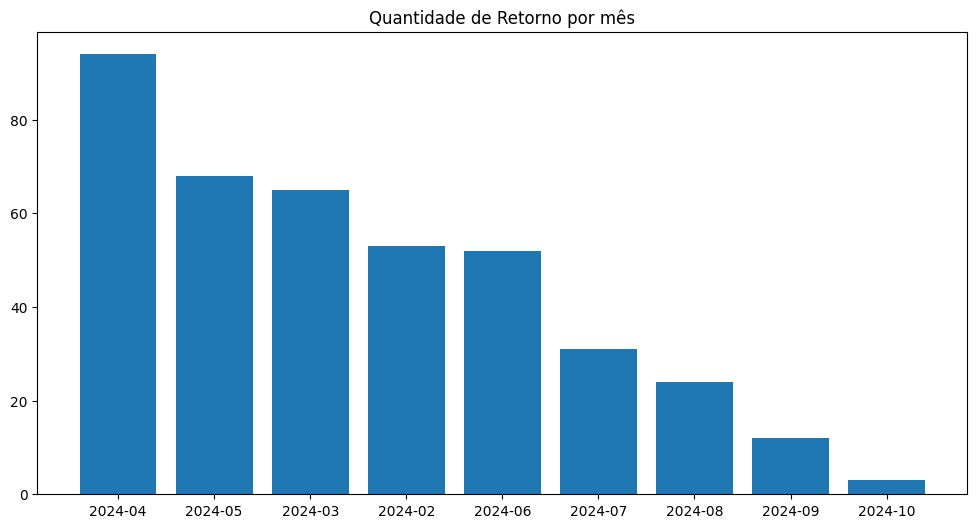

In [45]:
plt.figure(figsize=(12,6))
plt.bar(qtd_retorno_mes.index, qtd_retorno_mes.values)
#plt.xticks(rotation=90)
plt.title('Quantidade de Retorno por mês')
plt.show()

In [46]:
Devolucao_por_mes = dados_fatura.groupby('DtFatura')['Valor_Parcela'].sum().reset_index()

In [47]:
print(f" O total a ser recebido por cada mes dos noves avalia-se em: \n{Devolucao_por_mes['Valor_Parcela']}")

 O total a ser recebido por cada mes dos noves avalia-se em: 
0    37207.976017
1    43275.240346
2    81955.074026
3    62519.644935
4    35007.666147
5    19340.909177
6     9323.088571
7     4120.486494
8      820.223377
Name: Valor_Parcela, dtype: object


In [48]:
px.bar(Devolucao_por_mes, x='DtFatura', y='Valor_Parcela')

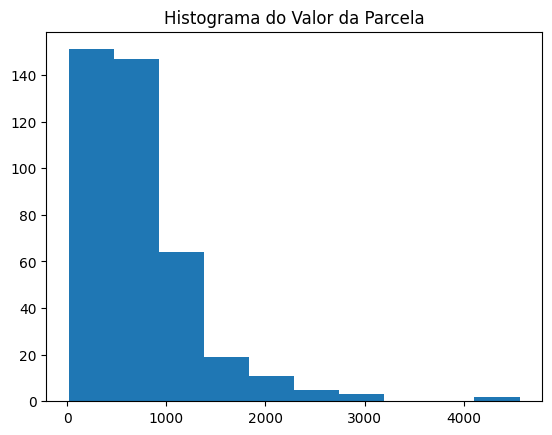

In [49]:
plt.hist(dados_mes.Valor_Parcela)
plt.title("Histograma do Valor da Parcela");

In [50]:
print(f" Aqui é representado o Emprestimo por Genero")

 Aqui é representado o Emprestimo por Genero


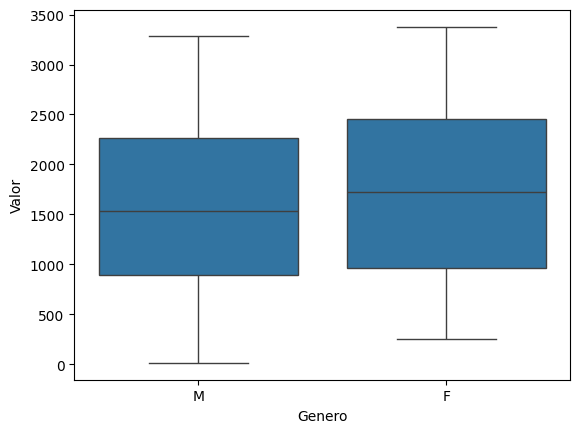

In [51]:
sns.boxplot(x ='Genero', y='Valor', data=dados);

In [52]:
dados_genero = dados.groupby('Genero')['Valor'].count().reset_index()

In [53]:
dados_genero

,Genero,Valor
0,F,57
1,M,121


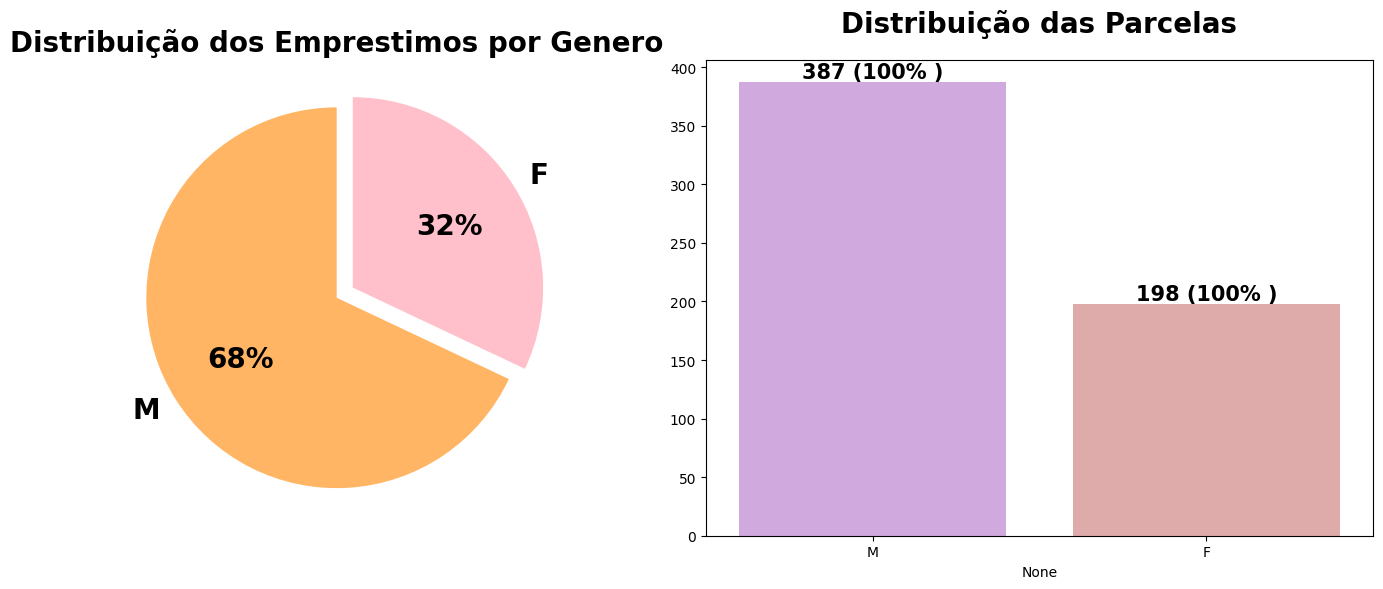

In [54]:
#Visualization to show Total Employees by Gender.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
gender_attrition = dados["Genero"].value_counts()
plt.title("Distribuição dos Emprestimos por Genero",fontweight="black",size=20)
plt.pie(gender_attrition, autopct="%.0f%%",labels=gender_attrition.index,textprops=({"fontweight":"black","size":20}),
        explode=[0,0.1],startangle=90,colors= ["#ffb563","#FFC0CB"])


#Visualization to show Employee Attrition by Gender.
plt.subplot(1,2,2)
new_df = dados_mes[dados_mes["Valor_Parcela"]=="Yes"]
value_1 = dados_fatura["Genero"].value_counts()
value_2 = dados_fatura["Genero"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,palette=["#D4A1E7","#E7A1A1"])
plt.title("Distribuição das Parcelas",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()